**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
  - [Loading the dataset and fitting a model](#toc1_2_)    
- [Quantifying model fit](#toc2_)    
    - [-> Coefficient of determination $(R^2)$](#toc2_1_1_)    
    - [-> Degrees of freedom and Adjusted $R^2$](#toc2_1_2_)    
    - [-> Mean squared error (MSE)](#toc2_1_3_)    
    - [-> Residual standard error (RSE)](#toc2_1_4_)    
- [Visualizing model fit](#toc3_)    
    - [-> Residuals vs. Fitted values plot](#toc3_1_1_)    
    - [-> Q-Q plot](#toc3_1_2_)    
    - [-> Scale-location plot](#toc3_1_3_)    
- [Outliers, Leverage, and Influence](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import statsmodels.formula.api as smf

### <a id='toc1_2_'></a>[Loading the dataset and fitting a model](#toc0_)

In [4]:
taiwan_real_estate = pd.read_csv("./datasets/taiwan_real_estate2.csv")

In [5]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [6]:
mdl_price_vs_nconv = smf.ols(
    formula="price_twd_msq ~ n_convenience", data=taiwan_real_estate
).fit()

## <a id='toc2_'></a>[Quantifying model fit](#toc0_)

#### <a id='toc2_1_1_'></a>[-> Coefficient of determination $(R^2)$](#toc0_)

The coefficient of determination or **R-squared** is the proportion of the variation in $y$, explained by the regression line (i.e, the variation in the independent variables X). So, if the model can explain 100% of the variation in $y$ by the variations of $X$ then it will have a $R^2$ score of 1. And, if the model completely fails to explain the variability of $y$ in relation to the variation of $X$ then it will have a $R^2$ score of 0.

The formula for calculating $R^2$ is given by,

$$R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}$$

Where:
- $y_i$ is the actual/observed value of the response variable
- $\hat{y_i}$ is the predicted/estimated value (lies on the regression line)
- $\bar{y}$ is the mean value of $y$

What constitutes **a good score** depends on your dataset. A score of 0.5 on a psychological experiment may be exceptionally high because humans are inherently hard to predict, but in other cases, a score of 0.9 may be considered a poor fit. 

**For simple linear regression**, the interpretation of the coefficient of determination is straightforward. It is simply the correlation between the explanatory and response variables, squared. 

In [7]:
mdl_price_vs_nconv.rsquared

0.32604660851305023

#### <a id='toc2_1_2_'></a>[-> Degrees of freedom and Adjusted $R^2$](#toc0_)

To find the degrees of freedom we need to ask ourselves how many independent pieces of information do we have to estimate the population parameters.

Let's consider the simple linear regression case. How many data points do we need to fit a regression model? The first intuition is that we need 2 data points to fit a line. So we need at least 2 data points to fit a liner regression model. Right? No, this is not the case. With only 2 observations, true we can draw a line through them but there will be no errors. A regression model needs the possibility of error. So, we need at least 3 data points to fit a simple linear regression model. So we would have (3-2) = 1 degree of freedom (if we only have 3 sample data points).

If we consider a multiple linear regression model with 2 independent variables then we would need at least 4 data points to fit the model (since with 3 data points you would be able to fit a plane through them but have no errors). So we would have (4-3) = 1 degree of freedom (if we only have 4 sample data points).

The general formula for degrees of freedom is given as,
$$df = n - k - 1$$

Where:
- $df$ is the degrees of freedom
- $n$ is the number of observations in the sample
- $k$ is the number of independent variables in the model

So we can see a pattern here. With a fixed number of sample observations, the more independent variables are added to the model the less degrees of freedom we have. This have a serious implication. As the degrees of freedom decreases, the opportunity/ability of the model to correctly identify the error (i.e, the measure of unexplained variation/randomness in the model) decreases. As a result we can add unrelated independent variables to the model and the model can still fit the data well. So we can fool ourselves into thinking that our model is performing better while in reality the model is just losing its ability to represent the error.

To account for this behavior we use the **adjusted R-squared** to evaluate how well the model fits the data (actually).

The **adjusted R-squared** is given as,
$$R^2_{adj} = 1 - [(1-R^2)(\frac{n-1}{n-k-1})]$$

In [8]:
mdl_price_vs_nconv.rsquared_adj

0.32441079931041195

In [9]:
# both R^2 and adj_R^2 are reported in the summary also
mdl_price_vs_nconv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           3.41e-37
Time:                        17:27:53   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <a id='toc2_1_3_'></a>[-> Mean squared error (MSE)](#toc0_)

Mean squared error (MSE) is the average of the squared errors or deviations. The formula for calculating MSE is given by,

$$MSE = \frac{1}{n - k - 1} \sum (y_i - \hat{y_i})^2$$

Where:
- $y_i$ is the actual/observed value of the response variable
- $\hat{y_i}$ is the predicted/estimated value (lies on the regression line)
- $n$ is the number of observations
- $k$ is the number of explanatory variables

The MSE is a measure of the quality of an estimator. It is always non-negative, and lower values are better. 

In [10]:
mdl_price_vs_nconv.mse_resid

11.450694757101191

#### <a id='toc2_1_4_'></a>[-> Residual standard error (RSE)](#toc0_)

Residual standard error (RSE) is the standard deviation of the residuals (prediction errors). RSE is found by taking the square root of MSE. 
$$ RSE = \sqrt{MSE}$$

Since the RSE has the same units as the response variable, it is useful for comparing two different models against a given dataset.

In [11]:
np.sqrt(mdl_price_vs_nconv.mse_resid)

3.383887521343047

The RSE is, very roughly speaking, a measure of the typical size of the residuals. That is, how much the predictions are typically wrong. It is a measure of the lack of fit of the model to the data. It is the average amount that the response will deviate from the true regression line. Lower values of RSE indicate better fit.

## <a id='toc3_'></a>[Visualizing model fit](#toc0_)

**If a linear regression model is a good fit, then the residuals are approximately normally distributed, with mean zero.**

#### <a id='toc3_1_1_'></a>[-> Residuals vs. Fitted values plot](#toc0_)

Residuals vs. Fitted values plot is a scatter plot of residuals on the y-axis and fitted values (predicted values) on the x-axis. The residuals are the difference between the observed values and the fitted values. The residuals vs. fitted values plot is used to detect non-linearity, unequal error variances, and outliers.

If residuals met the assumption that they are **normally distributed with mean zero**, then the **"lowess" trend line** should closely follow the **y=0** line on the plot. A LOWESS trend line is a smooth curve following the data. These aren't good for making predictions but are useful for visualizing trends.

> We can use the `sns.residplot(data, x, y, lowess, order)` function to plot the residuals vs. fitted values plot without any extra hassle. `x is the explanatory variable and y is the response variable`. Set `lowess=True` to add a LOWESS trend line to the plot. By default, `order=1` which means the function will fit a simple linear regression model to the data and plot the residuals vs. fitted values plot.

[Text(0.5, 0, 'fitted_values'), Text(0, 0.5, 'residuals')]

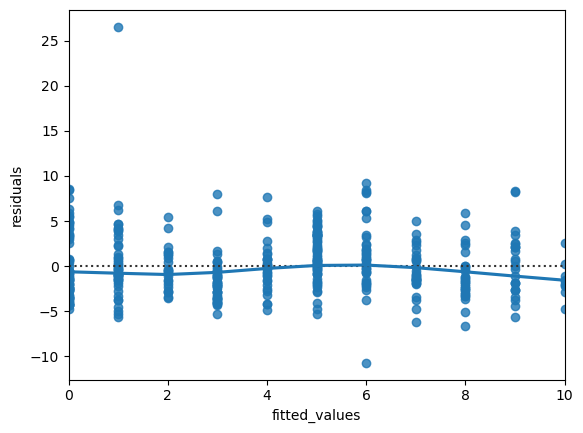

In [12]:
ax = sns.residplot(
    data=taiwan_real_estate, y="price_twd_msq", x="n_convenience", lowess=True
)
ax.set(xlabel="fitted_values", ylabel="residuals")

We can see that the lowess trend line closely follows the y=0 line indicating that a simple linear regression model is a good fit for the data.

#### <a id='toc3_1_2_'></a>[-> Q-Q plot](#toc0_)

A Q-Q plot is a scatter plot of the quantiles of the residuals vs. the quantiles of a normal distribution. If the residuals are **normally distributed**, then the points on the Q-Q plot should lie approximately on the **y=x** line.

> To draw a Q-Q plot we can use the `statsmodels.api.qqplot(residuals, line='s')` function. The `line='s'` argument draws the standardized 45-degree line on the plot.

In [13]:
from statsmodels.api import qqplot

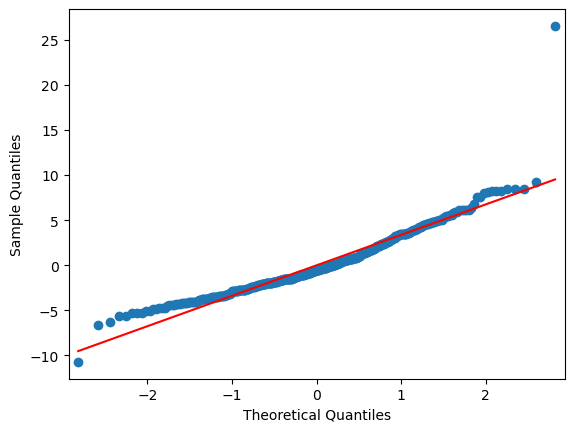

In [14]:
qqplot(mdl_price_vs_nconv.resid, line="s")
plt.show()

#### <a id='toc3_1_3_'></a>[-> Scale-location plot](#toc0_)

A scale-location plot is a scatter plot of the square root of the absolute normalized residuals vs. the fitted values. The square root of the absolute normalized residuals is used to stabilize the variance. If the residuals are **normally distributed with mean zero**, then the **"lowess" trend line** should be **parallel** to the **horizontal line**.

> To get the normalized residuals we use the `<fitted_model>.get_influence().resid_studentized_internal` method.

In [15]:
mdl_price_vs_nconv_norm_residuals = (
    mdl_price_vs_nconv.get_influence().resid_studentized_internal
)

> Now we can plot the scale-location plot using the `sns.regplot(x = mdl.fittedvalues, y = np.sqrt(abs(normalized_residuals)), ci = None, lowess = True)` function.

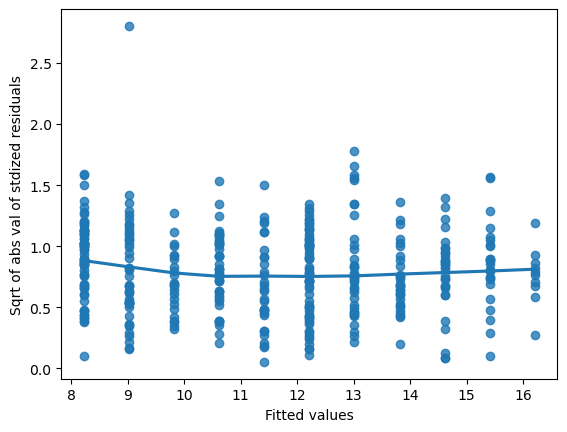

In [16]:
ax = sns.regplot(
    x=mdl_price_vs_nconv.fittedvalues,
    y=np.sqrt(abs(mdl_price_vs_nconv_norm_residuals)),
    lowess=True,
)
ax.set(xlabel="Fitted values", ylabel="Sqrt of abs val of stdized residuals")
plt.show()

**These three diagnostic plots are excellent for sanity-checking the quality of our models.**

## <a id='toc4_'></a>[Outliers, Leverage, and Influence](#toc0_)

Outliers are observations that are far away from the rest of the data. They can be caused by measurement errors, unusual events, or simply random variation. Outliers can have a large effect on the regression model. So, it is important to identify them and understand their impact on the model.

For only a single explanatory variable, spotting outliers is easy. We can simply plot the data and look for points that are far away from the rest of the data. It is also possible to use a threshold for filtering out the outliers. But for multiple explanatory variables, it is not that easy and the math is complicated.

`Leverage` measures how unusual or extreme the explanatory variables are for each observation. Leverage is a measure of how far away the explanatory variable values of an observation are from the mean of the explanatory variable values.

A high leverage point can certainly cause the regression line to shift however, leverage does not tell us how much the estimated coefficients of the model will change i.e, how exactly the shifting will be impacted by a high leverage point.

A related concept to leverage is `influence`. Influence is a measure of the impact of a specific data point on the regression model's coefficients, predictions, or goodness-of-fit measures (like R-squared). 

This is a type of `"leave one out" metric`. That is, it measures how much the model would change if you reran it without that data point. 

Influence can be quantified using various metrics, such as `Cook's distance`, `DFBETAS`, and `DFFITS`. The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

A high-influence point can cause the estimated coefficients to be biased or inaccurate.

Usually high leverage points also has high influence. However, it is possible for a data point to have high leverage but low influence. For example, a data point that is far away from the other points, but that is also close to the regression line, will have high leverage but low influence.

> Leverage and influence, along with other metrics, are retrieved from the `summary frame`. The summary frame is obtained by calling the `<fitted_model>.get_influence().summary_frame()` method.

In [17]:
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])
mdl_price_vs_dist = smf.ols(
    "price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate
).fit()

In [18]:
price_dist_summary_frame = mdl_price_vs_dist.get_influence().summary_frame()

In [19]:
price_dist_summary_frame.head()

,dfb_Intercept,dfb_sqrt_dist_to_mrt_m,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.094893,0.073542,4.648246e-03,-1.266363,0.005764,-0.096418,-1.267294,-0.096489
1,-0.013981,0.008690,1.216711e-04,-0.262996,0.003506,-0.015599,-0.262699,-0.015582
2,0.025510,-0.009963,6.231096e-04,0.688143,0.002625,0.035302,0.687703,0.035279
3,0.055525,-0.021686,2.939394e-03,1.494602,0.002625,0.076673,1.496850,0.076789
4,-0.000932,0.000518,6.055123e-07,-0.019716,0.003106,-0.001100,-0.019692,-0.001099


In [20]:
price_dist_summary_frame.shape

(414, 8)

- The leverage values are in the `hat_diag` column.

In [21]:
taiwan_real_estate_price_dist = taiwan_real_estate[
    ["sqrt_dist_to_mrt_m", "price_twd_msq"]
]

In [22]:
taiwan_real_estate_price_dist["leverage"] = price_dist_summary_frame["hat_diag"]

- The influence values are in the `cooks_d` column.

In [23]:
taiwan_real_estate_price_dist["influence_cooks_dist"] = price_dist_summary_frame[
    "cooks_d"
]

In [24]:
taiwan_real_estate_price_dist.sort_values(by="influence_cooks_dist", ascending=False)

,sqrt_dist_to_mrt_m,price_twd_msq,leverage,influence_cooks_dist
270,15.892835,35.552194,0.003849,1.155487e-01
148,61.486503,13.645991,0.012147,5.244008e-02
228,56.314554,14.099849,0.009332,3.538436e-02
220,13.656870,23.691377,0.004401,2.512289e-02
113,19.830799,2.299546,0.003095,2.281295e-02
...,...,...,...,...
298,63.890649,5.052950,0.013619,5.554280e-07
6,24.969443,12.193646,0.002530,3.896928e-07
265,28.564513,11.527988,0.002415,2.570474e-07
237,27.071254,11.800303,0.002435,2.501281e-07


- To see how influence works, let's remove 5 of the most influential observations 

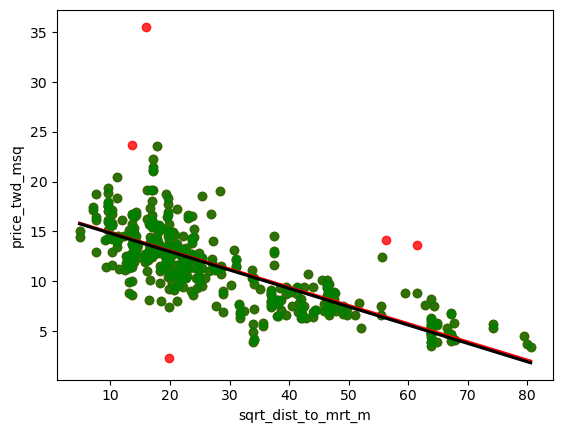

In [25]:
sns.regplot(
    x="sqrt_dist_to_mrt_m",
    y="price_twd_msq",
    data=taiwan_real_estate,
    ci=None,
    color="red",
)
sns.regplot(
    data=taiwan_real_estate_price_dist.sort_values(
        by="influence_cooks_dist", ascending=False
    )[5:],
    x="sqrt_dist_to_mrt_m",
    y="price_twd_msq",
    ci=None,
    color="green",
    line_kws={"color": "black"},
)
plt.show()